In [1]:
%env THEANO_FLAGS='device=cuda0'

env: THEANO_FLAGS='device=cuda0'


In [2]:
import network3
from network3 import Network, ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer, ReLU

import matplotlib.pyplot as plt
import numpy as np

Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_k8xjmhmq.c:4:10: fatal error: cudnn.h: No such file or directory\n    4 | #include <cudnn.h>\n      |          ^~~~~~~~~\ncompilation terminated.\n'
Mapped name None to device cuda0: NVIDIA GeForce RTX 3050 Ti Laptop GPU (0000:01:00.0)


In [3]:
training_data, validation_data, test_data = network3.load_data_shared()

Let's begin by inserting a convolutional layer, right at the beginning of the network. We'll use 5 by 5 local receptive fields, a stride length of 1, and 20 feature maps. We'll also insert a max-pooling layer, which combines the features using 2 by 2 pooling windows.

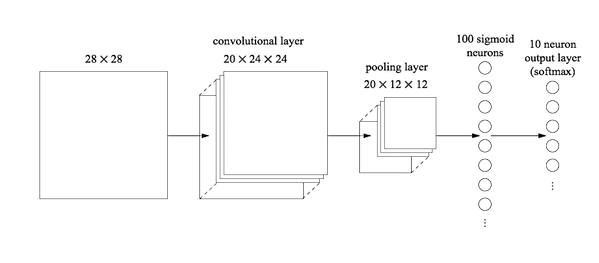

Epoch 0: 
Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Validation accuracy 94.32%
This is the best validation accuracy to date.
The corresponding test accuracy is 93.84%
Accuracy by Class:
    Class 0: 0.9938775510204082
    Class 1: 0.9788546255506608
    Class 2: 0.8701550387596899
    Class 3: 0.9356435643564357
    Class 4: 0.9409368635437881
    Class 5: 0.945067264573991
    Class 6: 0.9634655532359081
    Class 7: 0.9630350194552529
    Class 8: 0.8757700205338809
    Class 9: 0.9147670961347869
Precision:
    Class 0: 0.8943985307621671
    Class 1: 0.9771328056288479
    Class 2: 0.9771490750816104
    Class 3: 0.9273797841020608
    Class 4: 0.9665271966527197
    Class 5: 0.9173014145810664
    Class 6: 0.9447287615148413
    Class 7: 0.8975521305530372
    Class 8: 0.9562780269058296
    Class 9: 0.9342105263157895
Recall:
    Class 0: 0.9938775510204082
    Class

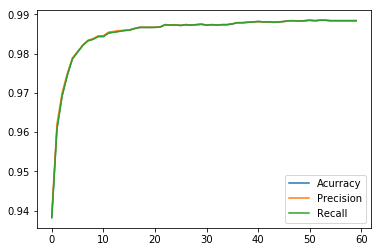

In [4]:
epochs = 60
mini_batch_size = 10
eta = 0.1
net = Network([
        ConvPoolLayer(
            image_shape=(mini_batch_size, 1, 28, 28), 
            filter_shape=(20, 1, 5, 5), 
            poolsize=(2, 2)
        ),
        FullyConnectedLayer(n_in=20*12*12, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)
    ],
    mini_batch_size
)
total_accurancy_series, total_precision_series, total_recal_series = net.SGD(training_data, epochs, mini_batch_size, eta, validation_data, test_data)
y = np.array(list(range(epochs)))
plt.plot(y, total_accurancy_series, label="Acurracy")
plt.plot(y, total_precision_series, label="Precision")
plt.plot(y, total_recal_series, label="Recall")
plt.legend()
plt.show()

Let's try inserting a second convolutional-pooling layer. We'll make the insertion between the existing convolutional-pooling layer and the fully-connected hidden layer. Again, we'll use a 5×5 local receptive field, and pool over 2×2 regions.

You can think of the second convolutional-pooling layer as having as input 12×12 "images", whose "pixels" represent the presence (or absence) of particular localized features in the original input image. So you can think of this layer as having as input a version of the original input image. That version is abstracted and condensed, but still has a lot of spatial structure, and so it makes sense to use a second convolutional-pooling layer.

Epoch 0: 
Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Validation accuracy 93.65%
This is the best validation accuracy to date.
The corresponding test accuracy is 93.64%
Accuracy by Class:
    Class 0: 0.9877551020408163
    Class 1: 0.9894273127753304
    Class 2: 0.8691860465116279
    Class 3: 0.9405940594059405
    Class 4: 0.9470468431771895
    Class 5: 0.9551569506726457
    Class 6: 0.9665970772442589
    Class 7: 0.9640077821011673
    Class 8: 0.8542094455852156
    Class 9: 0.8870168483647175
Precision:
    Class 0: 0.9325626204238922
    Class 1: 0.9573742540494459
    Class 2: 0.9781897491821155
    Class 3: 0.9350393700787402
    Class 4: 0.9375
    Class 5: 0.9161290322580645
    Class 6: 0.9287863590772317
    Class 7: 0.8887892376681614
    Class 8: 0.9563218390804598
    Class 9: 0.9401260504201681
Recall:
    Class 0: 0.9877551020408163
    Class 1: 0.98942

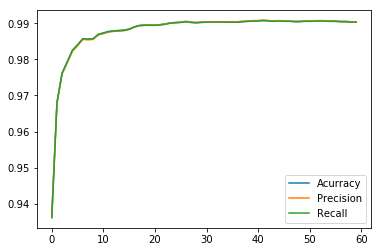

In [5]:
epochs = 60
mini_batch_size = 10
eta = 0.1
net = Network([
        ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2)),
        ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2)),
        FullyConnectedLayer(n_in=40*4*4, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
total_accurancy_series, total_precision_series, total_recal_series = net.SGD(training_data, epochs, mini_batch_size, eta, validation_data, test_data)
y = np.array(list(range(epochs)))
plt.plot(y, total_accurancy_series, label="Acurracy")
plt.plot(y, total_precision_series, label="Precision")
plt.plot(y, total_recal_series, label="Recall")
plt.legend()
plt.show()

Let's change our neurons so that instead of using a sigmoid activation function, we use rectified linear units. That is, we'll use the activation function f(z)≡max(0,z). We'll train for 60 epochs, with a learning rate of η=0.03. Also use some l2 regularization, with regularization parameter λ=0.1

Epoch 0: 
Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Validation accuracy 97.14%
This is the best validation accuracy to date.
The corresponding test accuracy is 96.74%
Accuracy by Class:
    Class 0: 0.996938775510204
    Class 1: 0.9894273127753304
    Class 2: 0.9718992248062015
    Class 3: 0.9693069306930693
    Class 4: 0.9613034623217923
    Class 5: 0.9820627802690582
    Class 6: 0.9770354906054279
    Class 7: 0.9698443579766537
    Class 8: 0.8963039014373717
    Class 9: 0.9573835480673935
Precision:
    Class 0: 0.9376199616122841
    Class 1: 0.979075850043592
    Class 2: 0.9737864077669903
    Class 3: 0.979
    Class 4: 0.9936842105263158
    Class 5: 0.9339019189765458
    Class 6: 0.9570552147239264
    Class 7: 0.9707887049659202
    Class 8: 0.9842164599774521
    Class 9: 0.965034965034965
Recall:
    Class 0: 0.996938775510204
    Class 1: 0.9894273127

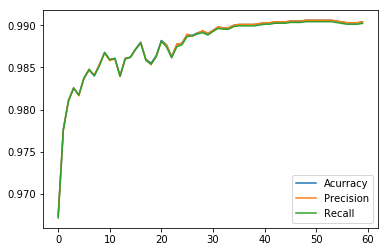

In [6]:
epochs = 60
mini_batch_size = 10
eta = 0.03
net = Network([
        ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
total_accurancy_series, total_precision_series, total_recal_series = net.SGD(training_data, epochs, mini_batch_size, eta, validation_data, test_data)
y = np.array(list(range(epochs)))
plt.plot(y, total_accurancy_series, label="Acurracy")
plt.plot(y, total_precision_series, label="Precision")
plt.plot(y, total_recal_series, label="Recall")
plt.legend()
plt.show()